In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
weather = pd.read_csv ('climate_data.csv')
weather.head(5)

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


(array([10., 20., 30., 40., 50., 60., 70.]),
 <a list of 7 Text major ticklabel objects>)

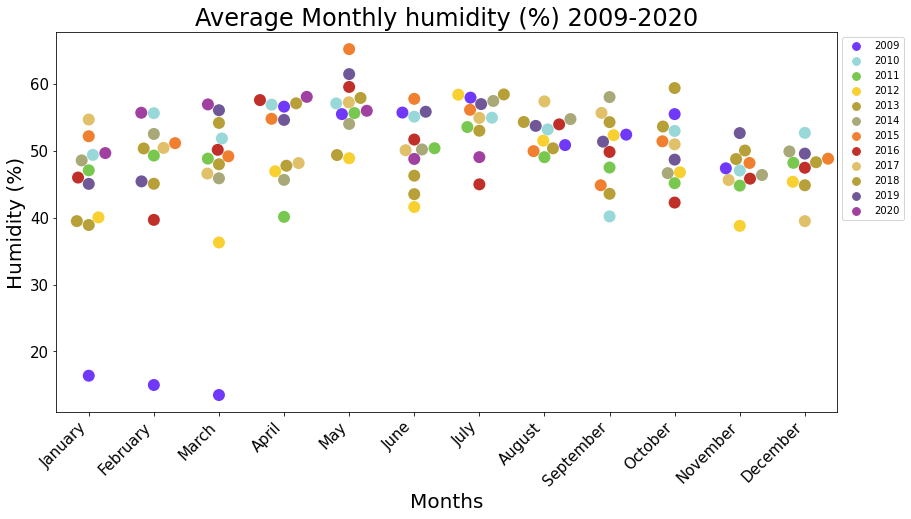

In [105]:
# Calculating data
humidity = weather
humidity["Date"] = pd.to_datetime(humidity["Date"])
humidity = humidity.set_index("Date")
humidity["Average Humidity (%)"] = (humidity["Minimum humidity (%)"] + humidity["Maximum humidity (%)"]) / 2.0
resampled_humidity = humidity["Average Humidity (%)"].resample("M").mean().to_frame()
resampled_humidity["Month"] = resampled_humidity.index.month
resampled_humidity.reset_index(inplace=True)

#Plotting

fig, ax = plt.subplots(figsize = (14,7))  
years = resampled_humidity["Date"].dt.strftime("%Y").sort_values()
palette_months = ["#7038F8", "#98D8D8", "#78C850", "#F8D030", "#B8A038", "#A8A878", "#F08030", "#C03028", "#E0C068", "#B8A038", "#705898", "#A040A0"]
fig = sns.swarmplot(x="Month", y="Average Humidity (%)", data=resampled_humidity, hue=years, size=12, edgecolor="gray", palette=palette_months)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
x_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax.set_xticklabels(labels=x_months, rotation=45, ha='right')

plt.ylabel("Humidity (%)", fontsize=20)
plt.xlabel("Months", fontsize=20)
plt.title("Average Monthly humidity (%) 2009-2020", fontsize=24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 10 Text major ticklabel objects>)

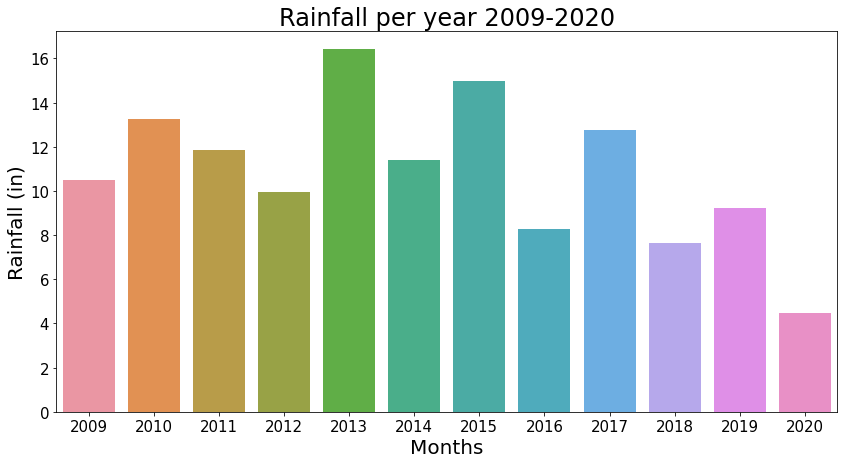

In [109]:
#Calculating data
rainfall = weather 
rainfall["Date"] = pd.to_datetime(rainfall["Date"])
rainfall = rainfall.set_index("Date")
rainfall["Year"] = rainfall.index.year

#Plotting
rainfall_resampled = rainfall.loc[rainfall.groupby([rainfall.index.to_period('Y')]).apply(lambda x: x.index.max())][["Rainfall for year (in)", "Year"]]
fig, ax = plt.subplots(figsize = (14,7)) 
fig = sns.barplot(x="Year", y="Rainfall for year (in)", data=rainfall_resampled)
plt.ylabel("Rainfall (in)", fontsize=20)
plt.xlabel("Months", fontsize=20)
plt.title("Rainfall per year 2009-2020", fontsize=24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)